# 10 - Atelier #1 - Introduction aux architectures sans serveurs avec Google Cloud Functions

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

#### Libraries requises

In [2]:
import json
import uuid
from pathlib import Path
import numpy as np

from google.cloud import storage

from utils import display_image, display_objects_results, display_faces_results

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 20

## Fonctions d'accès aux buckets

Pour plus de documentation sur les fonctions permettant le téléchargement et le téléversement des fichiers avec Google Storage, consultez les liens ci-dessous:
* [Uploading objects](https://cloud.google.com/storage/docs/uploading-objects#storage-upload-object-nodejs)
* [Downloading objects](https://cloud.google.com/storage/docs/downloading-objects)

#### Fonction permettant le téléversement de fichiers vers un bucket (Google Cloud Storage)

In [4]:
def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    storage_client = storage.Client()
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    blob.upload_from_filename(source_file_name)

    print('File {} uploaded to {}.'.format(
        source_file_name,
        destination_blob_name))

#### Fonction permettant le télécharement de fichiers depuis un bucket (Google Cloud Storage)

In [5]:
def download_blob(bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""
    storage_client = storage.Client()
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(source_blob_name)

    blob.download_to_filename(destination_file_name)

    print('Blob {} downloaded to {}.'.format(
        source_blob_name,
        destination_file_name))

## Paramètres et chemins

In [6]:
IMAGES_PATH = Path('images')
RESULTS_PATH = Path('results')
BUCKET_IMAGES = "a10-images"
BUCKET_RESULTS = "a10-results"

## Téléversement d'une image

In [7]:
images = list(IMAGES_PATH.iterdir())
images

[PosixPath('images/bicycle_original.jpeg'),
 PosixPath('images/star-wars-9-poster.jpg'),
 PosixPath('images/sw7.jpg'),
 PosixPath('images/raptors.jpg')]

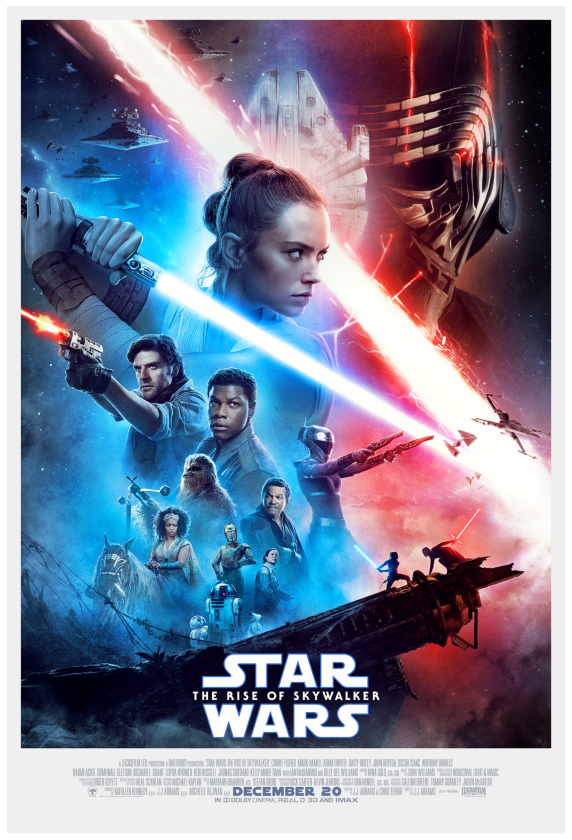

In [8]:
IMAGE = images[1] # Choisir votre image ici
_ = display_image(IMAGE)

L'image sera stockée dans le bucket par un GUID

<h3 style="color: red">Exercice - code à compléter</h3>

Afin d'éviter tout conflit de noms avec les images téléchargées, les images sont renommées lors du téléversement dans le bucket. Pour ceci, complétez le code ci-dessous en utilisant un **GUID**

In [9]:
# TODO: le nom de l'image (guid + extension du fichier)
# ~ 1 ligne
DST_NAME = None 
DST_NAME

'1bbc38e2-36b1-47bb-84fb-cb249b032f15.jpg'

In [10]:
!export GOOGLE_APPLICATION_CREDENTIALS="420-a57-sf-4cfaf339151b.json"

In [11]:
upload_blob(BUCKET_IMAGES, str(IMAGE), DST_NAME)

File images/star-wars-9-poster.jpg uploaded to 1bbc38e2-36b1-47bb-84fb-cb249b032f15.jpg.


## Resultats de la détection d'objets

In [ ]:
filename = DST_NAME + '.objects.json'
dst_path = RESULTS_PATH/filename

In [ ]:
download_blob(BUCKET_RESULTS, filename, dst_path)

In [ ]:
with open(dst_path) as f:
    data = f.read()
results = json.loads(data)

In [ ]:
display_objects_results(IMAGE, results, 0.8)

## Resultats de la détection de visages

In [ ]:
filename = DST_NAME + '.faces.json'
dst_path = RESULTS_PATH/filename

In [ ]:
download_blob(BUCKET_RESULTS, filename, dst_path)

In [ ]:
with open(dst_path) as f:
    data = f.read()
results = json.loads(data)

In [ ]:
display_faces_results(IMAGE, results)